In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(Data[:, 0])
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [14]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 0.6 
n_lin_guess = 21e-7
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 0.7
n_quad_guess = 21e-7
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

Linear Parameters:
Amplitude: -0.0031389432407620587 $\pm$ 0.0051375137769855295
n: 1.1509934691081701e-06 $\pm$ 3.61456929001586e-07
Offset: 14.117499038326772 $\pm$ 0.0036327387173698267

Quadratic Parameters:
Amplitude: 0.06426648817737286 +/- [0]
n: 2.1037405747709383e-06 +/- 5.231266031431276e-09
Offset: 14.117455074665495 +/- 0.0036327536222849934
m: -8.54958675626367e-08 +/- 2.8097115006172005e-08


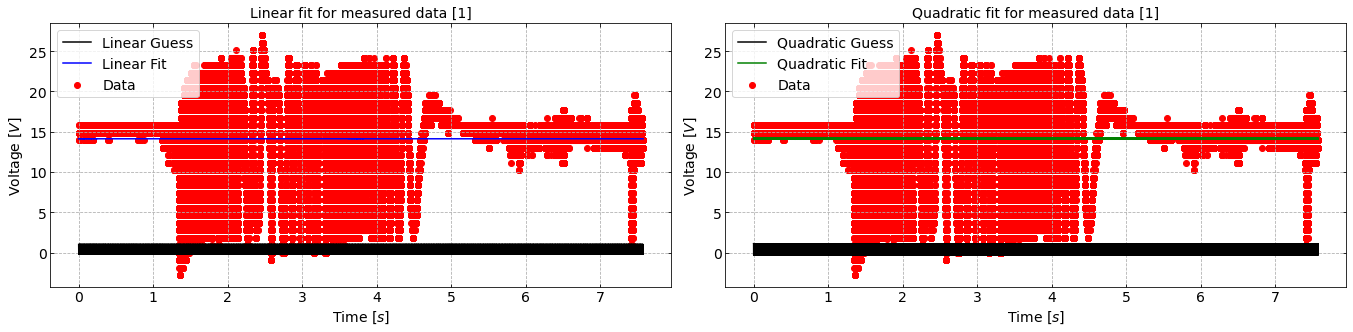

Linear Parameters:
Amplitude: -0.002627751200846893 $\pm$ 0.0052083351334460655
n: 2.1577116605474476e-06 $\pm$ 4.2092274411798284e-07
Offset: 14.399650009371433 $\pm$ 0.003682847828084645

Quadratic Parameters:
Amplitude: 0.05398353819537148 +/- [0]
n: 2.078297807292779e-06 +/- 3.800036957906229e-09
Offset: 14.399578451658842 +/- 0.0036828809993749655
m: -2.7019777808227163e-08 +/- 1.3278860373123894e-08


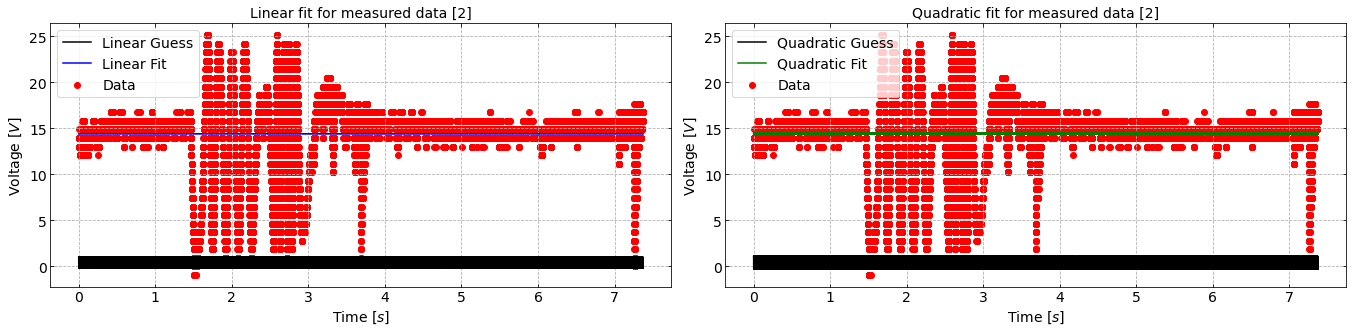

Linear Parameters:
Amplitude: 0.0024892453613914087 $\pm$ 0.005320348411143461
n: 2.1290093292197315e-06 $\pm$ 4.071529582558083e-07
Offset: 14.007535625700648 $\pm$ 0.003762057903344504

Quadratic Parameters:
Amplitude: 0.0276267540130642 +/- [0]
n: 2.043567748659721e-06 +/- 1.582880311522994e-08
Offset: 14.007504586455767 +/- 0.003762158835680601
m: 9.282380485631689e-08 +/- 8.096365446906056e-08


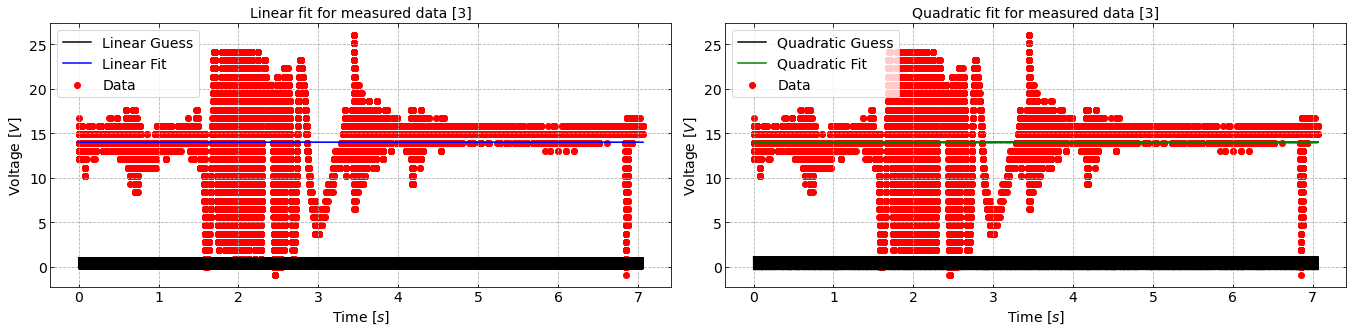

Linear Parameters:
Amplitude: -0.0019151814778425571 $\pm$ 0.0048804589289814255
n: 2.2977492469704268e-06 $\pm$ 5.352517329678968e-07
Offset: 11.97847200372814 $\pm$ 0.0034509851930147064

Quadratic Parameters:
Amplitude: -0.06647799298943985 +/- [0]
n: 2.0891942397777027e-06 +/- 1.8761144004573897e-09
Offset: 11.978604704384432 +/- 0.0034509967758931856
m: -6.5583260704591896e-09 +/- 3.4414190102137375e-09


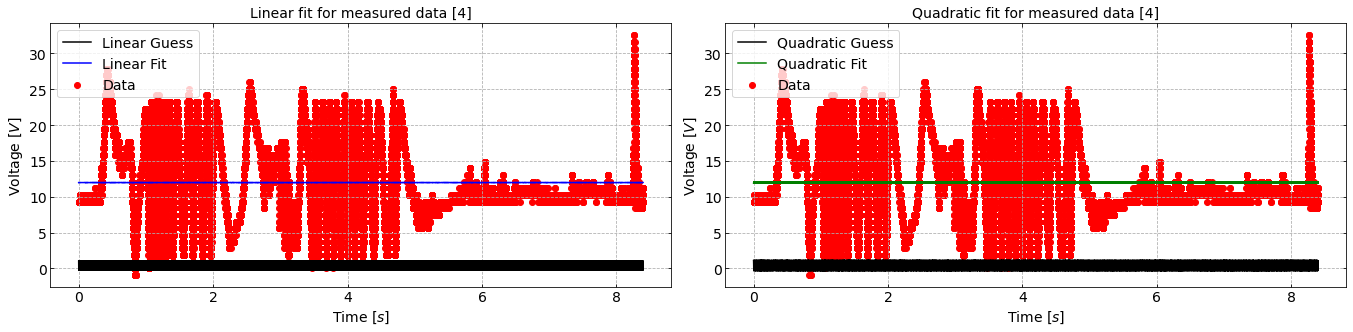

Linear Parameters:
Amplitude: -0.00045954320123553494 $\pm$ 0.0046585154864823945
n: 2.099921299817631e-06 $\pm$ 1.4799852602878105e-06
Offset: 13.721903037195432 $\pm$ 0.003294039218141295

Quadratic Parameters:
Amplitude: 0.03993993419058171 +/- [0]
n: 2.0995192868568893e-06 +/- 3.812213407472148e-09
Offset: 13.721932043907238 +/- 0.003294051249521539
m: 6.375561874078338e-08 +/- 2.179870979377236e-08


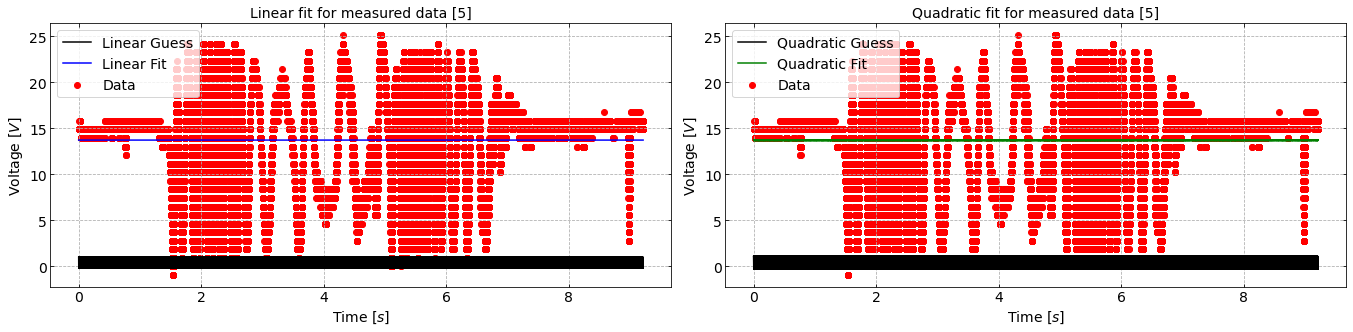

Linear Parameters:
Amplitude: 0.001634479892966606 $\pm$ 0.004558295033878288
n: 2.0604516167037737e-06 $\pm$ 4.1757894221564753e-07
Offset: 13.649128813623886 $\pm$ 0.0032231913988268485

Quadratic Parameters:
Amplitude: 0.04181073950654873 +/- [0]
n: 2.1132080893360887e-06 +/- 2.069542539438343e-09
Offset: 13.649147588759487 +/- 0.0032233017515902918
m: 3.7181115443568057e-09 +/- 3.1006184502280027e-09


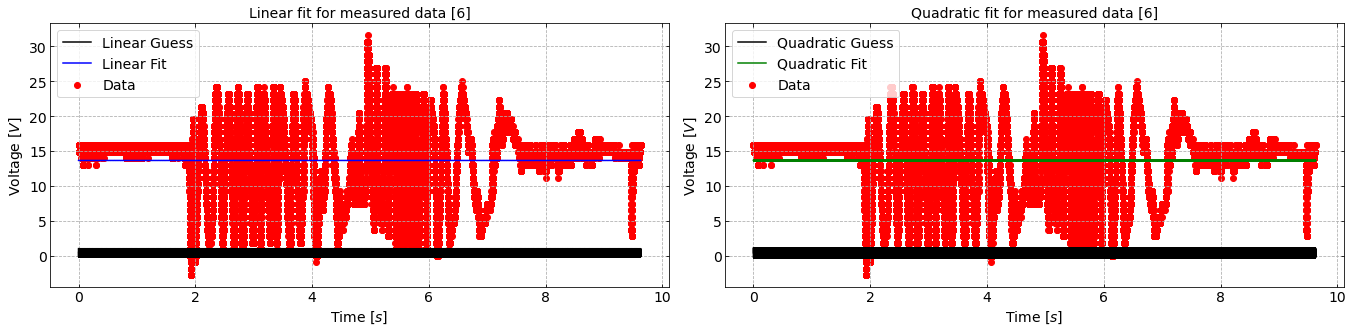

Linear Parameters:
Amplitude: 0.0012610219802922618 $\pm$ 0.004472031471341147
n: 2.1023157580188625e-06 $\pm$ 4.77708268005413e-07
Offset: 13.507104819062492 $\pm$ 0.003162214404133667

Quadratic Parameters:
Amplitude: -0.05997751459770597 +/- [0]
n: 2.113860893076503e-06 +/- 1.297462670036161e-09
Offset: 13.50702934249014 +/- 0.0031622792564374373
m: 9.289997032273755e-10 +/- 1.0169063234711965e-09


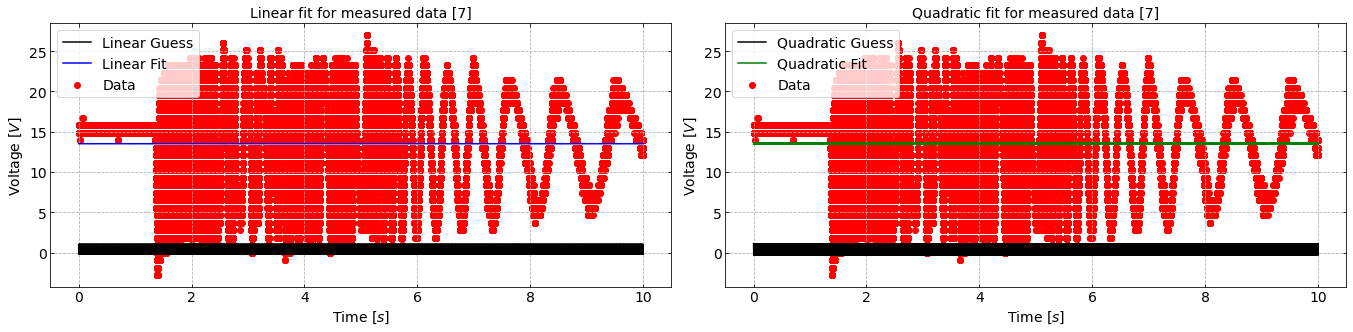

Linear Parameters:
Amplitude: 0.0017035380688297768 $\pm$ 0.004607601288892016
n: 2.356369951664207e-06 $\pm$ 3.8196734636558835e-07
Offset: 13.554795519787959 $\pm$ 0.003258037723494898

Quadratic Parameters:
Amplitude: 0.020035236292401205 +/- [0]
n: 2.099762253252895e-06 +/- 4.518976499090168e-09
Offset: 13.554785666066596 +/- 0.0032580504883020695
m: -9.228522492324552e-12 +/- 6.473786531968841e-10


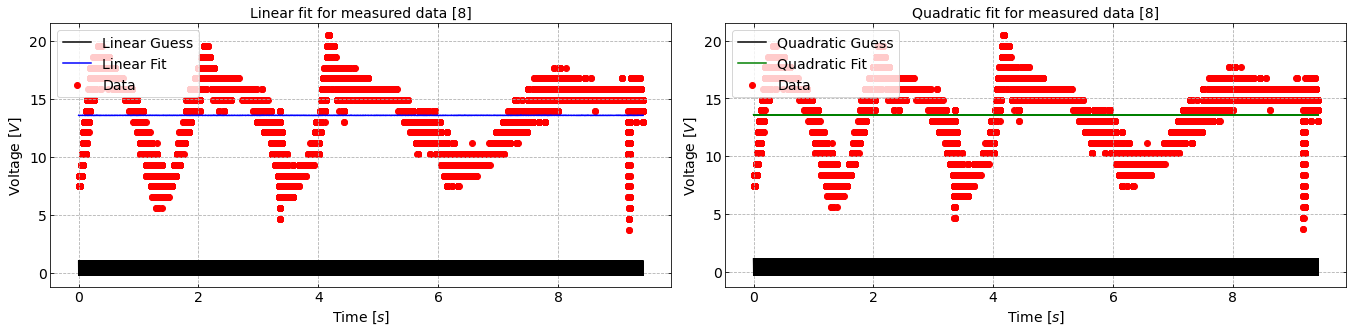

Linear Parameters:
Amplitude: -0.0005614531447267757 $\pm$ 0.004472033414738648
n: 2.10023248641791e-06 $\pm$ 1.0657039653807836e-06
Offset: 13.743217849012538 $\pm$ 0.003162214422246579

Quadratic Parameters:
Amplitude: -0.0593458047249938 +/- [0]
n: 2.0909351708302563e-06 +/- 3.1966557832115393e-09
Offset: 13.743175063769883 +/- 0.0031622333498728945
m: -1.472115655965124e-07 +/- 2.3241795483802983e-08


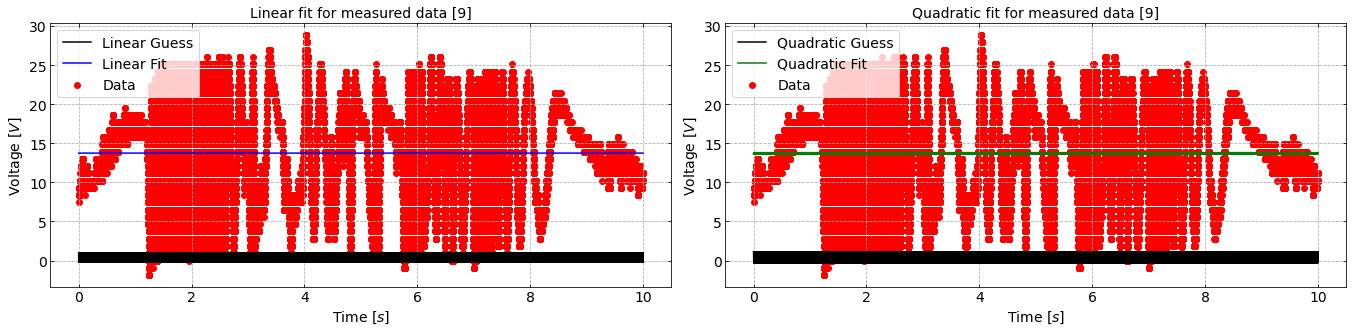

Linear Parameters:
Amplitude: -0.003892658262759807 $\pm$ 0.011047972250882677
n: 2.9983158233461528e-06 $\pm$ 2.3251907045576293e-06
Offset: 14.624986157836542 $\pm$ 0.007812500012725963

Quadratic Parameters:
Amplitude: 0.023784855253128928 +/- [0]
n: 3.4326618825427382e-06 +/- 1.1918061854376165e-06
Offset: 14.62516601861031 +/- 0.007813000227064236
m: -1.5356169518129222e-06 +/- 1.514808400412862e-06


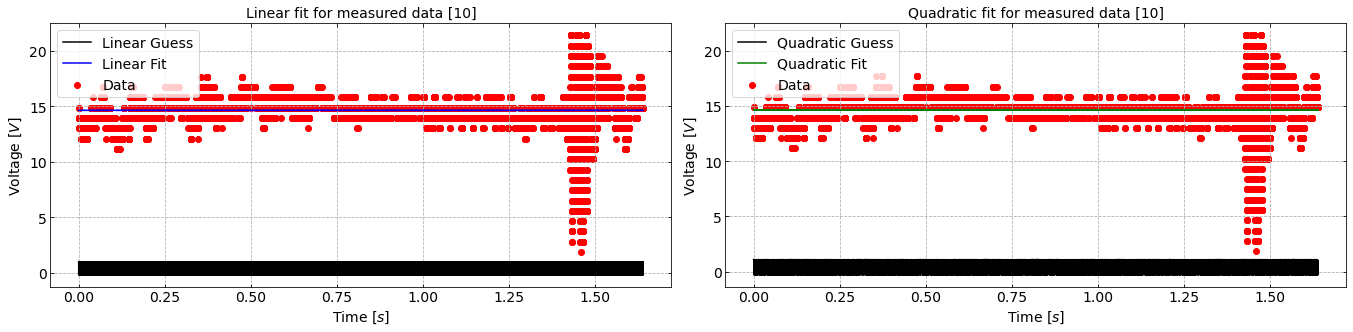

Linear Parameters:
Amplitude: 0.0038407960571807827 $\pm$ 0.008206852313747213
n: 2.6024890994238866e-06 $\pm$ 9.676197766780196e-07
Offset: 13.536915159019435 $\pm$ 0.005802979313771874

Quadratic Parameters:
Amplitude: -0.044994926077788426 +/- [0]
n: 1.6455345515493418e-06 +/- 1.4220388834734813e-07
Offset: 13.536567784725026 +/- 0.0058034777965335176
m: 1.0569101275344403e-06 +/- 3.285947630242574e-07


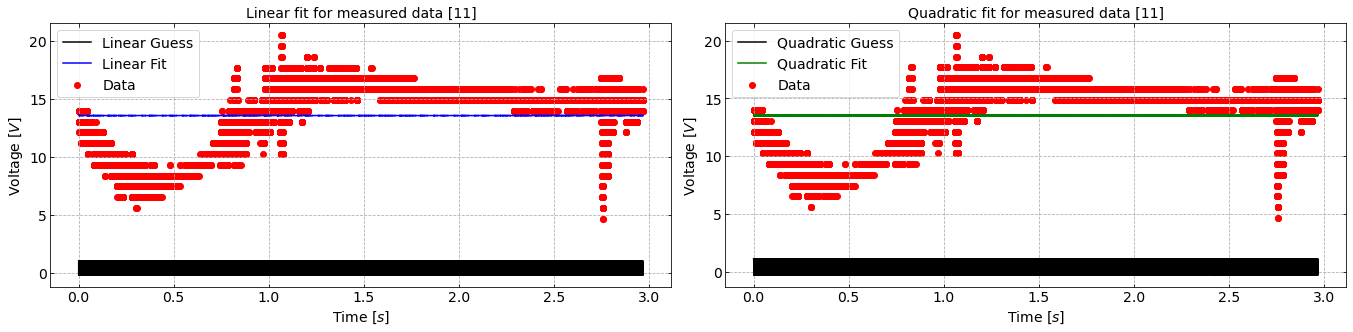

Linear Parameters:
Amplitude: -0.00018134914135758962 $\pm$ 0.004472023771663049
n: 2.0998871295325976e-06 $\pm$ 3.317924185027298e-06
Offset: 12.486034424749345 $\pm$ 0.003162214424782826

Quadratic Parameters:
Amplitude: 0.03183117579508736 +/- [0]
n: 2.0943868584618542e-06 +/- 2.5232373238929234e-09
Offset: 12.486016995475147 +/- 0.003162250503773819
m: -6.685831607278192e-09 +/- 5.169608996689892e-09


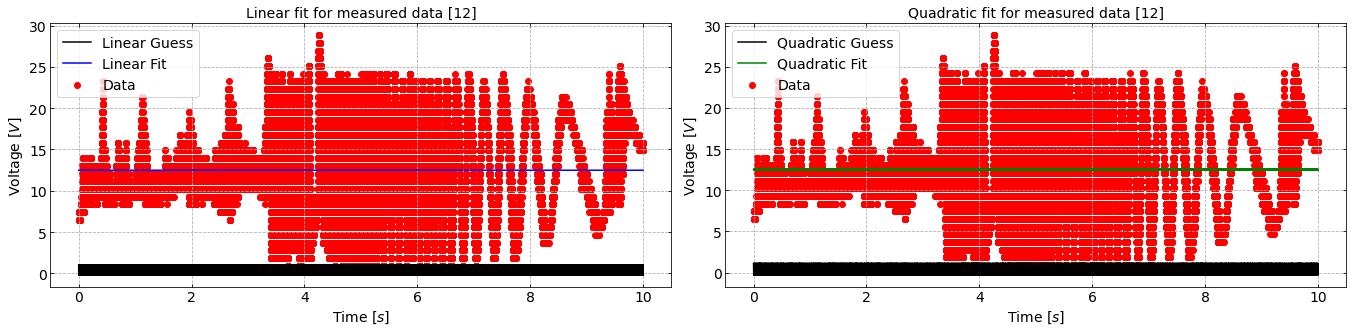

Linear Parameters:
Amplitude: -0.0018505725036688616 $\pm$ 0.0051725939473513125
n: 2.0535937105661034e-06 $\pm$ 5.028507021556563e-07
Offset: 13.878401651067099 $\pm$ 0.0036575358354715855

Quadratic Parameters:
Amplitude: -0.028829967668697398 +/- [0]
n: 2.0868281988830743e-06 +/- 8.18660220709627e-09
Offset: 13.878397661608199 +/- 0.0036576136474712096
m: 4.287542013848515e-08 +/- 3.577520577210479e-08


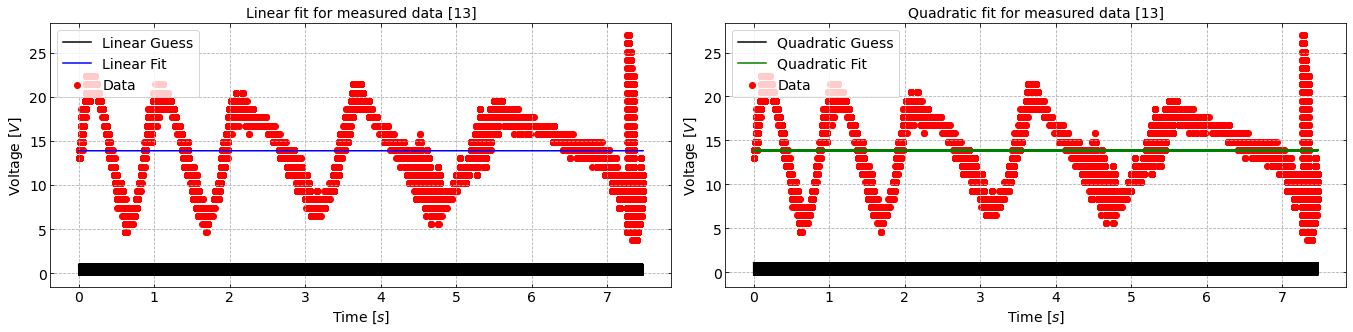

Linear Parameters:
Amplitude: 0.0008109907757021251 $\pm$ 0.004472030670893181
n: 2.1002393981527452e-06 $\pm$ 7.420616588120232e-07
Offset: 14.03997479959939 $\pm$ 0.0031622144147856464

Quadratic Parameters:
Amplitude: -0.033804043061057165 +/- [0]
n: 2.083824935005217e-06 +/- 2.4564630402515335e-09
Offset: 14.039973120841575 +/- 0.003162238807751126
m: 1.3309676978041387e-08 +/- 7.064618061355867e-09


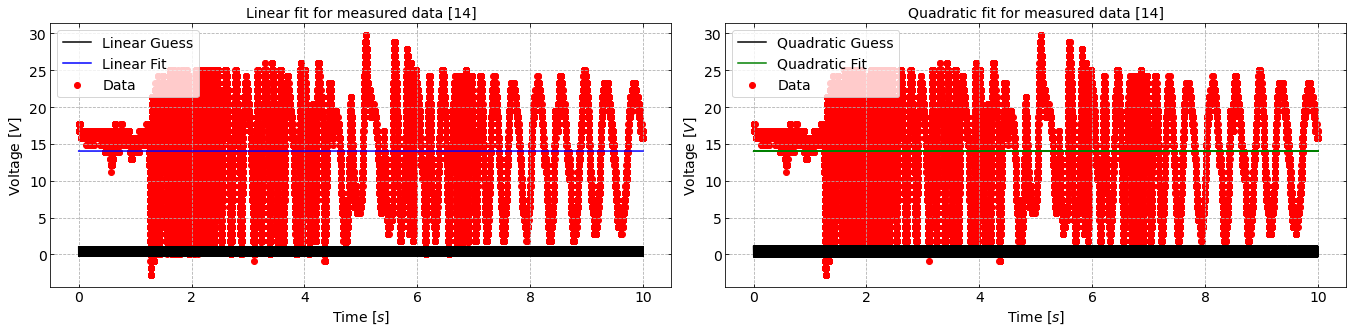

Linear Parameters:
Amplitude: -0.001980754179094014 $\pm$ 0.004658419718579678
n: 2.0016425417753897e-06 $\pm$ 4.044508692691302e-07
Offset: 13.23122701864097 $\pm$ 0.003294039223422977

Quadratic Parameters:
Amplitude: 0.020096274093280093 +/- [0]
n: 2.0998928823286448e-06 +/- 6.8609739277047265e-09
Offset: 13.231218775273257 +/- 0.00329405560775747
m: -5.3876283344075225e-08 +/- 3.664338021803765e-08


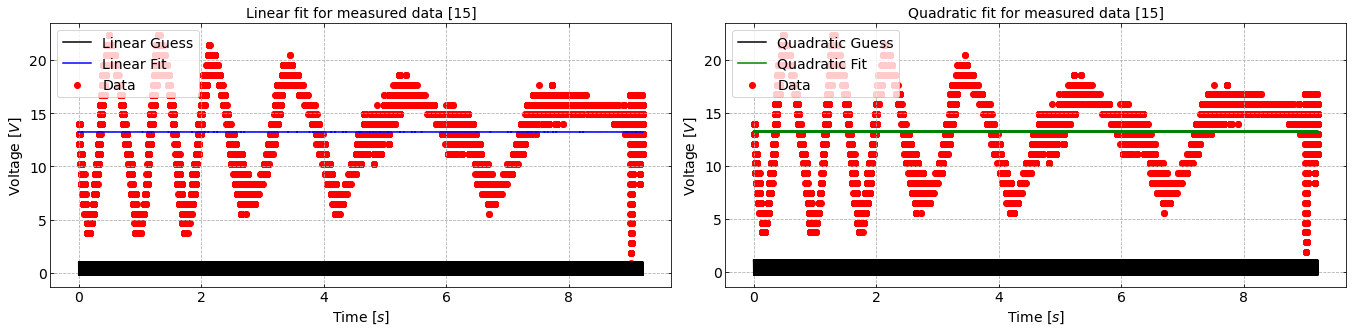

Linear Parameters:
Amplitude: -0.0024399212390327084 $\pm$ 0.004471994863041768
n: 2.160934471643691e-06 $\pm$ 2.723180732184506e-07
Offset: 13.191897746814607 $\pm$ 0.003162214415113378

Quadratic Parameters:
Amplitude: 0.008015050035343313 +/- [0]
n: 2.09920094221421e-06 +/- 1.0229504149429961e-08
Offset: 13.191886642552399 +/- 0.003162221149088073
m: -1.0726640908139497e-08 +/- 2.65928379605991e-08


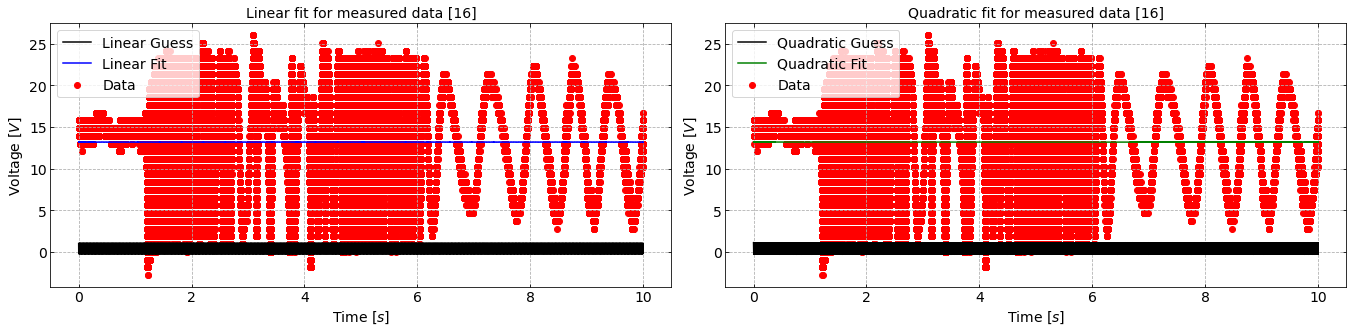

Linear Parameters:
Amplitude: 0.0023656678001775966 $\pm$ 0.004472020965859965
n: 2.0378986471607388e-06 $\pm$ 3.080520473248716e-07
Offset: 14.327941375854099 $\pm$ 0.003162214405429844

Quadratic Parameters:
Amplitude: -0.0570148604196509 +/- [0]
n: 2.151077158895127e-06 +/- 4.867243767673399e-09
Offset: 14.328127335502883 +/- 0.0031622908333530223
m: -3.7789525174399244e-07 +/- 3.7505887003363494e-08


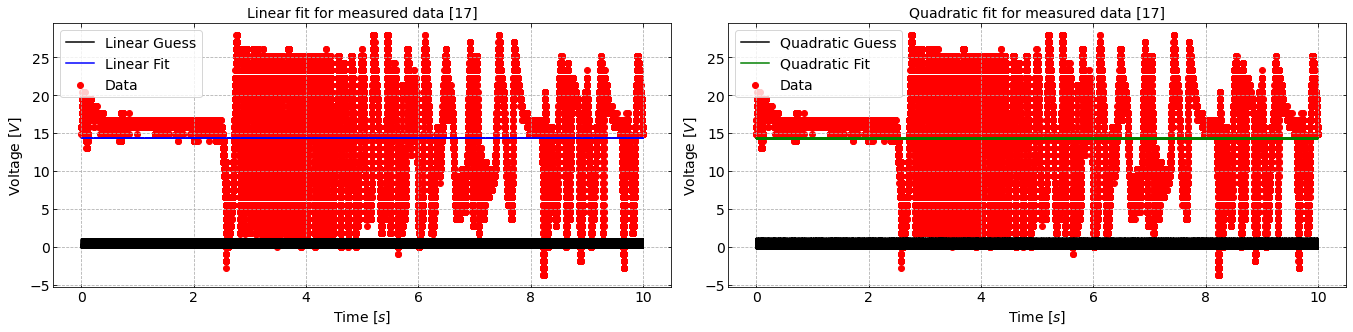

Linear Parameters:
Amplitude: 0.0008142349964193907 $\pm$ 0.004765567699022641
n: 2.1227436993737734e-06 $\pm$ 8.908138639174676e-07
Offset: 13.637249727835016 $\pm$ 0.0033697741497377173

Quadratic Parameters:
Amplitude: -0.016283361528246606 +/- [0]
n: 2.1137247554157673e-06 +/- 7.59988573072986e-09
Offset: 13.637236977595569 +/- 0.003369814945780138
m: -2.474928737522973e-08 +/- 2.7053055864903253e-08


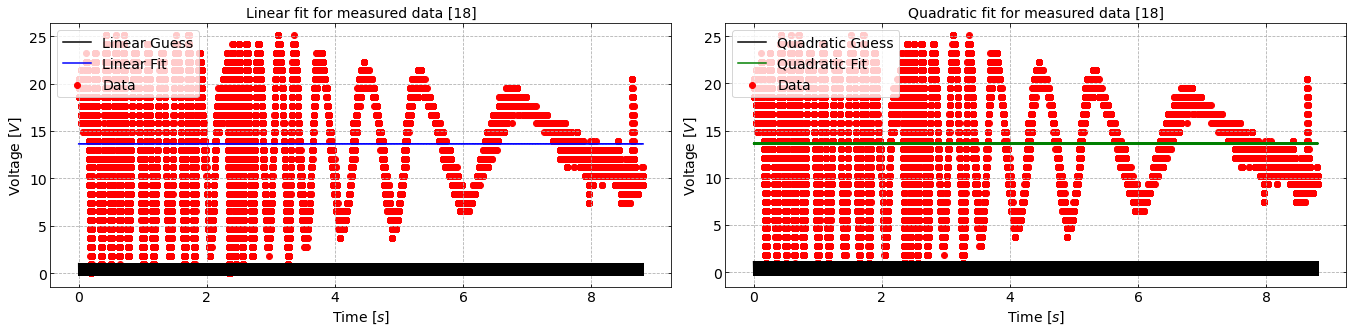

Linear Parameters:
Amplitude: -0.00012048235779593686 $\pm$ 0.004472034001299542
n: 2.1001390744722112e-06 $\pm$ 4.966019580561646e-06
Offset: 14.0408811338543 $\pm$ 0.003162214411732688

Quadratic Parameters:
Amplitude: -0.03326426988332183 +/- [0]
n: 2.872419958810569e-06 +/- 9.325087005475817e-09
Offset: 14.040935989488059 +/- 0.0031622464957662983
m: -4.315968229403778e-06 +/- 7.231632184788243e-08


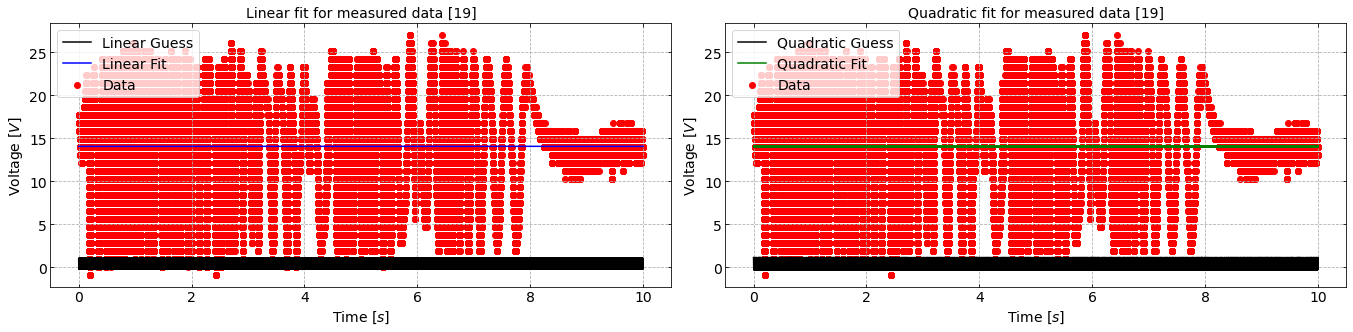

Linear Parameters:
Amplitude: -0.007465795452040131 $\pm$ 0.01332578230396436
n: 3.1753548779367145e-06 $\pm$ 2.141142210273254e-06
Offset: 11.51704671460628 $\pm$ 0.009422229630287451

Quadratic Parameters:
Amplitude: -0.01970959130213009 +/- [0]
n: -7.98702642254464e-06 +/- 3.7119888571995456e-06
Offset: 11.517017450705014 +/- 0.009423031504587816
m: -1.5078788594868081e-06 +/- 3.2424037531232653e-06


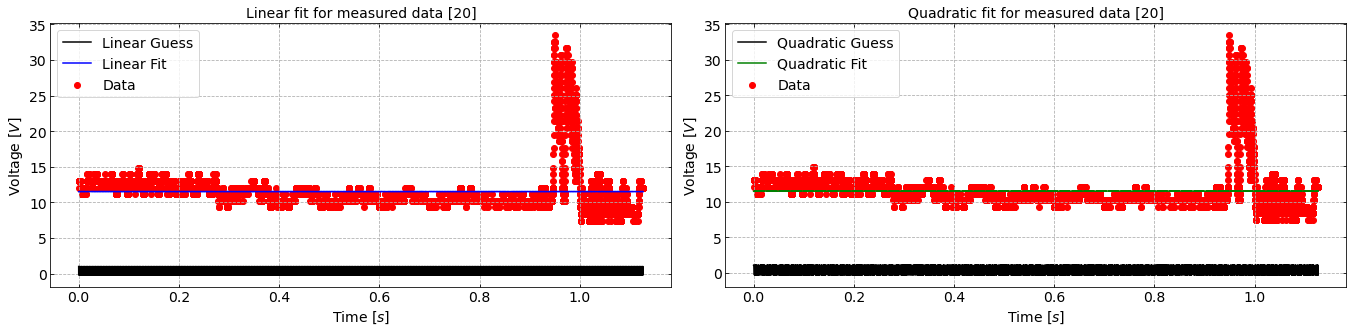

In [15]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

#Here is my loop where i plot for curve fits with different powers.
for i in range(len(time)):
    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i], V1[i], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for measured data {[i+1]}')
    plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='black')  # Plot linear fit
    plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls = '--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i], V1[i], p0=p0_Quad, absolute_sigma=True)
    #calc standard deviation of the fitted parameters
    quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='black')  # Plot quadratic fit
    plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls = '--')
    plt.tight_layout()
    
    #Print statements to get the fitted parameters
    print("Linear Parameters:")
    print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    print("n:", popt_1[1], '$\pm$', lin_err[1])
    lin_const.append(popt_1[1])
    lin_sigma.append(lin_err[1])
    print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    print("Amplitude:", popt_2[0], "+/-", [0])
    print("n:", popt_2[1], "+/-", quad_err[1])
    print("Offset:", popt_2[2], "+/-", quad_err[2])
    print("m:", popt_2[3], "+/-", quad_err[3])
    plt.show()